In [438]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [439]:
csv_directory = "C:\\Users\\noabe\\Documents\\רייכמן\\Lab\\shir"
data = pd.DataFrame()
for file in os.listdir(csv_directory):
  if file.endswith(".csv"):
    # Construct the full path to the CSV file
    file_path = os.path.join(csv_directory, file)
    temp_df = pd.read_csv(file_path)
    subject_id = file[:-4]
    temp_df["Subject"] = subject_id

    data = pd.concat([data, temp_df])
      
data.head(20)


,Subject,Event.Nr,CDA.nSCR,CDA.Latency,CDA.AmpSum,CDA.SCR,CDA.ISCR,CDA.PhasicMax,CDA.Tonic,TTP.nSCR,TTP.Latency,TTP.AmpSum,Global.Mean,Global.MaxDeflection,Event.NID,Event.Name
0,115,1,3,0.0918,0.1803,0.0022,0.1745,0.0912,6.0756,0,NaN,0.0000,6.1604,0.0124,90,90
1,115,2,1,1.0893,0.0478,0.0010,0.0821,0.1043,7.9206,1,0.8643,0.0417,7.9667,0.0554,95,95
2,115,3,0,NaN,0.0000,0.0000,0.0013,0.0306,7.9565,1,0.8248,0.2646,7.9661,0.0350,80,80
3,115,4,1,1.2643,0.0507,0.0015,0.1223,0.0692,8.1122,0,NaN,0.0000,8.1770,0.0349,81,81
4,115,5,0,NaN,0.0000,0.0007,0.0555,0.0437,8.2481,0,NaN,0.0000,8.2852,0.0179,82,82
5,115,6,1,1.2327,0.0189,0.0004,0.0315,0.0501,8.3189,0,NaN,0.0000,8.3247,0.0523,83,83
6,115,7,0,NaN,0.0000,0.0009,0.0759,0.0490,8.3846,0,NaN,0.0000,8.4295,0.0121,84,84
7,115,8,1,1.8698,0.0668,0.0013,0.1045,0.0969,8.4041,1,0.5697,0.0345,8.4371,0.0207,85,85
8,115,9,1,0.9843,0.0504,0.0015,0.1183,0.0887,10.7773,0,NaN,0.0000,10.8116,0.0015,86,86
9,115,10,1,1.0612,0.0567,0.0022,0.1768,0.1143,10.2224,0,NaN,0.0000,10.3322,0.0000,40,40


In [440]:
# Initialize the block number
# block_number = 0
# data['Block'] = 0  # Start with an empty block column
# 
# # Loop through the DataFrame to assign block numbers
# for i in range(len(data)):
#     if data.at[i, 'Event.NID'] == 95:
#         block_number += 1
#     data.at[i, 'Block'] = block_number

In [441]:
temperature_labels = ["noPain", "Low", "Medium", "High"]
temperature_conditions = [
    (data["Event.NID"] >= 20) & (data["Event.NID"] <= 26),
    (data["Event.NID"] >= 40) & (data["Event.NID"] <= 46),
    (data["Event.NID"] >= 60) & (data["Event.NID"] <= 66),
    (data["Event.NID"] >= 80) & (data["Event.NID"] <= 86)
]
data["Temperature"] = np.select(temperature_conditions, temperature_labels, default="None")

event_labels = ["square1", "square2", "square3", "square4", "square5", "heatPulse", "painRating"]
event_conditions = [
    data['Event.NID'].isin([20,40,60,80]),
    data['Event.NID'].isin([21,41,61,81]),
    data['Event.NID'].isin([22,42,62,82]),
    data['Event.NID'].isin([23,43,63,83]),
    data['Event.NID'].isin([24,44,64,84]),
    data['Event.NID'].isin([25,45,65,85]),
    data['Event.NID'].isin([26,46,66,86])
]
data["Event"] = np.select(event_conditions, event_labels, default="None")

print(data[['Subject', 'Event.NID', 'Temperature', 'Event']])


    Subject  Event.NID Temperature       Event
0       115         90        None        None
1       115         95        None        None
2       115         80        High     square1
3       115         81        High     square2
4       115         82        High     square3
..      ...        ...         ...         ...
283      70         83        High     square4
284      70         84        High     square5
285      70         85        High   heatPulse
286      70         86        High  painRating
287      70         92        None        None

[4564 rows x 4 columns]


In [442]:
# # Grouped data
# data.groupby(['Subject', "Event.NID"])
# 
# data.head(20)

In [443]:
# calc average in those columns
columns_to_average = ['Global.Mean', 'CDA.Tonic']
average_data = data.groupby(['Subject', 'Temperature', 'Event'])[columns_to_average].mean().reset_index()
print(average_data)


    Subject Temperature       Event  Global.Mean  CDA.Tonic
0       115        High   heatPulse     10.30489    9.96478
1       115        High  painRating     12.62179   12.57665
2       115        High     square1     10.25992   10.10849
3       115        High     square2     10.15155   10.08408
4       115        High     square3     10.04932   10.01400
..      ...         ...         ...          ...        ...
517      70      noPain     square1     27.56589   27.42562
518      70      noPain     square2     27.38835   27.32330
519      70      noPain     square3     27.27175   27.17791
520      70      noPain     square4     27.10151   27.04868
521      70      noPain     square5     26.94803   26.91427

[522 rows x 5 columns]


In [444]:
# not working !!!!
data.replace('None', np.nan, inplace=True)
data_cleaned = data.dropna(subset=['Temperature', 'Event'])
print(data_cleaned)


    Subject  Event.Nr  CDA.nSCR CDA.Latency  CDA.AmpSum  CDA.SCR  CDA.ISCR  \
2       115         3         0         NaN      0.0000   0.0000    0.0013   
3       115         4         1      1.2643      0.0507   0.0015    0.1223   
4       115         5         0         NaN      0.0000   0.0007    0.0555   
5       115         6         1      1.2327      0.0189   0.0004    0.0315   
6       115         7         0         NaN      0.0000   0.0009    0.0759   
..      ...       ...       ...         ...         ...      ...       ...   
282      70       283         0         NaN      0.0000   0.0000    0.0000   
283      70       284         1      0.7692      0.0628   0.0042    0.3349   
284      70       285         3      0.1893      0.2633   0.0053    0.4250   
285      70       286         0         NaN      0.0000   0.0080    0.6371   
286      70       287         1      0.4127      0.0430   0.0051    0.4045   

     CDA.PhasicMax  CDA.Tonic  TTP.nSCR TTP.Latency  TTP.AmpSum

In [445]:
global_mean_data = data.groupby('Event.NID').agg(
    Global_Mean=('Global.Mean', 'mean'),
    Global_Std=('Global.Mean', 'std')
).reset_index()
data = data.merge(global_mean_data, on='Event.NID', how='left')

tonic_mean_data = data.groupby('Event.NID').agg(
    Tonic_Mean=('CDA.Tonic', 'mean'),
    Tonic_Std=('CDA.Tonic', 'std')
).reset_index()
data = data.merge(tonic_mean_data, on='Event.NID', how='left')

data['Global_Minus_Tonic'] = data['Global_Mean'] - data['Tonic_Mean']

print(data.head())

  Subject  Event.Nr  CDA.nSCR CDA.Latency  CDA.AmpSum  CDA.SCR  CDA.ISCR  \
0     115         1         3      0.0918      0.1803   0.0022    0.1745   
1     115         2         1      1.0893      0.0478   0.0010    0.0821   
2     115         3         0         NaN      0.0000   0.0000    0.0013   
3     115         4         1      1.2643      0.0507   0.0015    0.1223   
4     115         5         0         NaN      0.0000   0.0007    0.0555   

   CDA.PhasicMax  CDA.Tonic  TTP.nSCR  ... Global.MaxDeflection  Event.NID  \
0         0.0912     6.0756         0  ...               0.0124         90   
1         0.1043     7.9206         1  ...               0.0554         95   
2         0.0306     7.9565         1  ...               0.0350         80   
3         0.0692     8.1122         0  ...               0.0349         81   
4         0.0437     8.2481         0  ...               0.0179         82   

   Event.Name  Temperature    Event  Global_Mean Global_Std Tonic_Mean  \


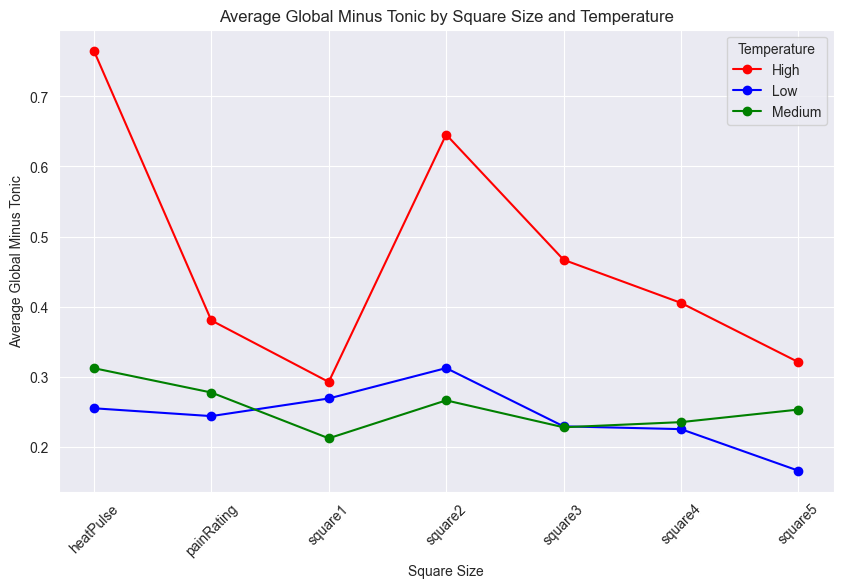

In [446]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

colors = {'Low': 'blue', 'Medium': 'green', 'High': 'red', 'noPain': 'gray'}  # Map categories to colors

# Sort data for proper line continuity if necessary
data.sort_values('Event', inplace=True)

# Calculate and plot a line for each temperature level, skipping 'noPain'
for temp_label, temp_data in data.groupby('Temperature'):
    if temp_label != 'noPain':  # Skip 'noPain' category
        # Calculate the average 'Global_Minus_Tonic' for each event within the current temperature category
        grouped_data = temp_data.groupby('Event')['Global_Minus_Tonic'].mean().reset_index()
        plt.plot(grouped_data['Event'], grouped_data['Global_Minus_Tonic'], marker='o', linestyle='-', label=temp_label, color=colors[temp_label])

plt.xlabel('Square Size')  # Add x-axis label
plt.ylabel('Average Global Minus Tonic')  # Add y-axis label
plt.title('Average Global Minus Tonic by Square Size and Temperature')  # Add title
plt.legend(title='Temperature')  # Add legend with title
plt.grid(True)  # Add grid for easier reading
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()  # Display the plot

In [447]:
# condition_order = ["NoPain", "Low", "Medium", "High"]
# 
# data_to_check = data[data["Event"] == "heatPulse"]
# data_to_check["Temperature"] = pd.Categorical(data_to_check["Temperature"], categories=condition_order, ordered=True)
# ax = sns.lineplot(data=data_to_check, x="Temperature", y="GlobalMinusTonic", hue="temperature_conditions")
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))